# India COVID-19 Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/Country_wise_total.csv')
df.head()

,Unnamed: 0,Afghanistan_case,Albania_case,Algeria_case,Andorra_case,Angola_case,Antigua and Barbuda_case,Argentina_case,Armenia_case,Australia_case,...,Botswana_recov,Burundi_recov,Sierra Leone_recov,Malawi_recov,South Sudan_recov,Western Sahara_recov,Sao Tome and Principe_recov,Yemen_recov,Comoros_recov,Tajikistan_recov
0,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
India = df[['Unnamed: 0','India_case','India_death','India_recov']]

In [4]:
case = India[['Unnamed: 0', 'India_case']]

In [5]:
case.columns = ['date','case']

In [6]:
case.head()

,date,case
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0


In [7]:
case[case['case']==1]

,date,case
8,1/30/20,1.0
9,1/31/20,1.0
10,2/1/20,1.0


In [8]:
df2 = case.iloc[8:,:]

In [9]:
df2.head()

,date,case
8,1/30/20,1.0
9,1/31/20,1.0
10,2/1/20,1.0
11,2/2/20,2.0
12,2/3/20,3.0


In [10]:
df2.shape

(104, 2)

In [11]:
df2['days'] = np.arange(1,105)

/home/king/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
p = PolynomialFeatures(degree=5)

In [13]:
X = p.fit_transform(df2[['days']])
y = df2['case']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X)
lr.score(X_test,y_test)

0.9974606059968248

In [15]:
lr.score(X_train,y_train), lr.score(X,y)

(0.9993848619870049, 0.9993645325642295)

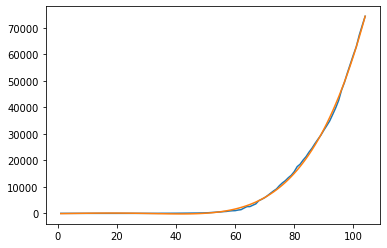

In [16]:
plt.plot(df2.days,df2.case)
plt.plot(df2.days,y_pred)

In [17]:
df2['lin_pred'] = y_pred

/home/king/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
from sklearn.metrics import r2_score
y_exp = [1.115 ** i for i in df2['days']]
r2_score(df2['case'],y_exp)

0.9029350301482115

In [19]:
df2['exp_pred'] = y_exp

/home/king/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


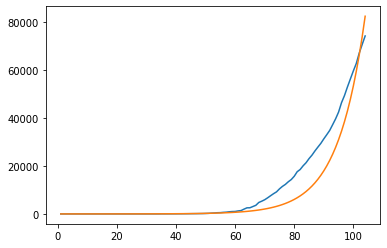

In [20]:
plt.plot(df2.days,df2.case)
plt.plot(df2.days,y_exp)

In [21]:
from sklearn.metrics import r2_score

In [22]:
df3 = df2[df2.index%10 == 0]

In [23]:
# df3['date'] = pd.to_datetime(df3['date'])

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 10 to 110
Data columns (total 5 columns):
date        11 non-null object
case        11 non-null float64
days        11 non-null int64
lin_pred    11 non-null float64
exp_pred    11 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 528.0+ bytes


In [25]:
df3.drop([10,40,50], inplace=True)

/home/king/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 

In [26]:
df3

,date,case,days,lin_pred,exp_pred
20,2/11/20,3.0,13,83.225965,4.116928
30,2/21/20,3.0,23,85.864243,12.227057
60,3/22/20,396.0,53,334.581086,320.308137
70,4/1/20,1998.0,63,2569.261429,951.298135
80,4/11/20,8446.0,73,8089.762264,2825.304876
90,4/21/20,20080.0,83,19118.158022,8391.005251
100,5/1/20,37257.0,93,38601.670764,24920.839417
110,5/11/20,70768.0,103,70303.911559,74013.567942


In [27]:
c = 8.2/2.54
d = 11.8/2.54
df = df3

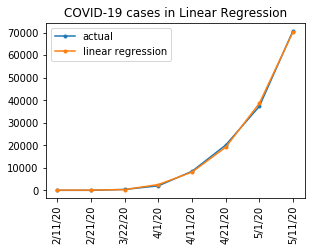

In [28]:
fig,ax = plt.subplots()
ax.plot(df['date'],df['case'], marker='.')
ax.plot(df['date'], df['lin_pred'], marker='.')
ax.set_xticklabels(df['date'], rotation=90)
plt.legend(['actual','linear regression'])
plt.title('COVID-19 cases in Linear Regression')
fig.set_size_inches(d,c)
plt.savefig('case_vs_linpred.jpg', dpi=300)

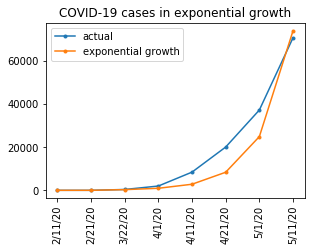

In [29]:
fig,ax = plt.subplots()
ax.plot(df['date'],df['case'], marker='.')
ax.plot(df['date'], df['exp_pred'], marker='.')
ax.set_xticklabels(df['date'], rotation=90)
plt.legend(['actual','exponential growth'])
plt.title('COVID-19 cases in exponential growth')
fig.set_size_inches(d,c)
plt.savefig('case_vs_exppred.jpg', dpi=300)

In [30]:
df2['death'] = India['India_death']
df2['recov'] = India['India_recov']

/home/king/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/king/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# fig,ax = plt.subplots()
# ax.plot(df['date'],df['death'], marker='.')
# ax.set_xticklabels(df['date'], rotation=90)
# plt.legend(['deaths due to COVID-19'])
# plt.title('COVID-19 deaths')
# fig.set_size_inches(d,c)
# plt.savefig('deaths.jpg', dpi=300)

In [32]:
# fig,ax = plt.subplots()
# ax.plot(df['date'],df['recov'], marker='.')
# ax.set_xticklabels(df['date'], rotation=90)
# plt.legend(['recovers : COVID-19'])
# plt.title('COVID-19 recoveries')
# fig.set_size_inches(d,c)
# plt.savefig('recovery.jpg', dpi=300)

In [33]:
# on may 17

may17 = 109
d = p.transform([[109]])
lr.predict(d)

array([97092.99166125])

In [34]:
d = [[111],[118],[125],[132],[139],[146],[153]]
days = ['may 19','may 26','jun 2','jun 9','jun 16', 'jun 23', 'jun 30']
ed = [2,9,16,23,30,37,44]

In [35]:
d2 = p.transform(d)
lr_p = lr.predict(d2)
lr_p

array([107569.43633066, 151256.36265202, 207560.76961499, 278937.68146863,
       368130.14709311, 478184.57493813, 612466.06796125])

In [36]:
eg = [int(1.115 ** i)*96429 for i in ed]

In [37]:
d = {'Dates':days, 'exp':eg, 'linp':lr_p}
df_p = pd.DataFrame(d)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

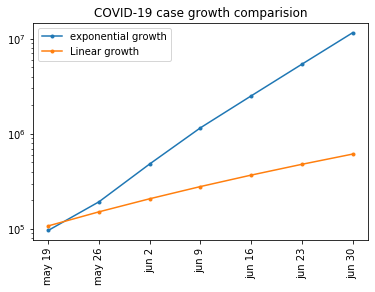

In [38]:
fig,ax = plt.subplots()
ax.plot(df_p['Dates'],df_p['exp'], marker='.')
ax.plot(df_p['Dates'], df_p['linp'], marker='.')
ax.set_xticklabels(df_p['Dates'], rotation=90)
plt.legend(['exponential growth','Linear growth'])
plt.title('COVID-19 case growth comparision')
plt.yscale('log')
fig.set_size_inches(d,c)
plt.savefig('exp vs lin.jpg', dpi=300)

In [ ]:
[round(i,2) for i in lr.coef_]

In [ ]:
lr.score(X_train,y_train), lr.score(X_test,y_test)

In [ ]:
df

In [ ]:
d = pd.Series([99.89, 90.78])
d.index = ['Linear Regression', 'exponential']
d

In [ ]:
plt.bar(d.index, d)

In [43]:
l = np.arange(10000).reshape(-1,1)
o = p.transform(l)
d = lr.predict(o)

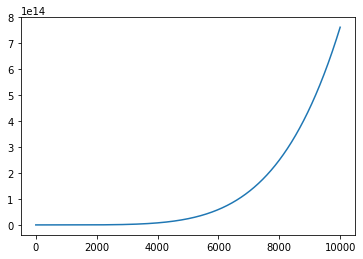

In [44]:
plt.plot(l,d)